In [15]:
import sys
import os
from argparse import ArgumentParser
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from Functions import mse,ssim,mse2
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [16]:
folderpath = '/opt/data/private/varifold/Case/abdomens_all/100'
stepsize=8
fixed_vert_list = np.load(folderpath +  '/dy_data/4/vert_fixed_' + str(stepsize) + '.npy')
#fixed_face_list = np.load(folderpath +  '/dy_data/6/face_fixed_' + str(stepsize) + '.npy')
moving_vert_list = np.load(folderpath +  '/dy_data/4/vert_moving_' + str(stepsize) + '.npy')
#moving_face_list = np.load(folderpath +  '/dy_data/6/face_moving_' + str(stepsize) + '.npy')

In [17]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
warped_vert_list = np.load(folderpath + '/result/4/34.npy')* [2,2,2]

In [18]:
#mse 第一个是没有配准的地方 第二个是对齐程度

#mse(moving_vert_list,fixed_vert_list)
#ssim(moving_vert_list,fixed_vert_list)

mse(moving_vert_list,warped_vert_list)
ssim(moving_vert_list,warped_vert_list)

sum1: 80.94209037045462 sum2: 363.2652506745322
0.9335990007352561


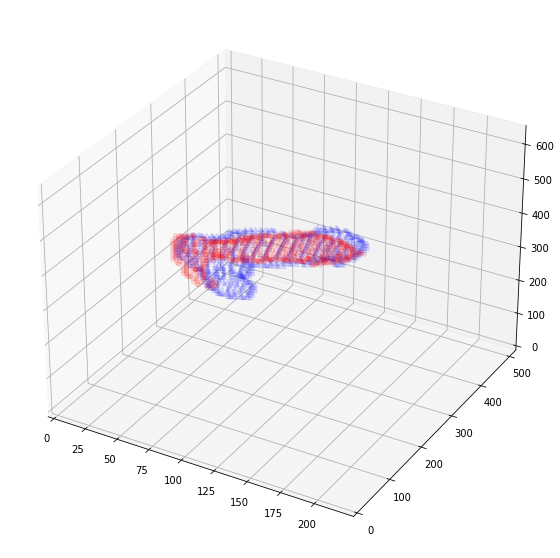

In [19]:
fig = plt.figure(figsize=(20,10))#
ax = fig.add_subplot(111, projection='3d')


ax.scatter(fixed_vert_list[:,0], fixed_vert_list[:,1], fixed_vert_list[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(moving_vert_list[:,0], moving_vert_list[:,1], moving_vert_list[:,2], c='b', marker='^', alpha=0.1)

ax.set_xlim(0, 224)  # a = 6 (times two for 2nd ellipsoid)224-521-640
ax.set_ylim(0, 512)  # b = 10
ax.set_zlim(0,640)

plt.show()

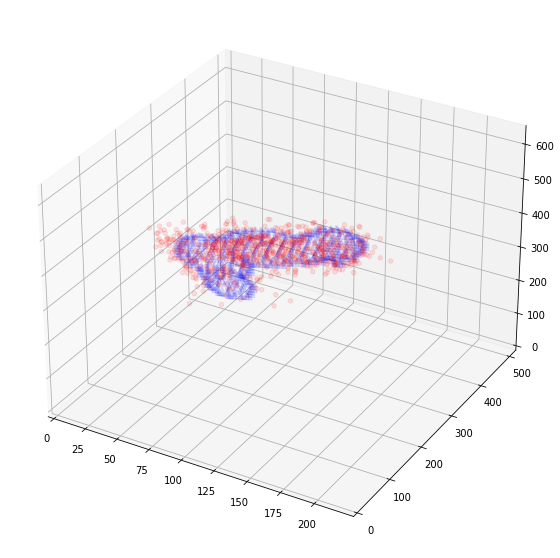

In [20]:
fig = plt.figure(figsize=(20,10))#
ax = fig.add_subplot(111, projection='3d')


ax.scatter(warped_vert_list[:,0], warped_vert_list[:,1], warped_vert_list[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(moving_vert_list[:,0], moving_vert_list[:,1], moving_vert_list[:,2], c='b', marker='^', alpha=0.1)

ax.set_xlim(0, 224)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 512)  # b = 10
ax.set_zlim(0, 640)

plt.show()

In [21]:
np.save('/opt/data/private/varifold/Case/abdomens_all/100/result/download.npy', warped_vert_list)